In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn_pandas import gen_features
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
df = pd.read_csv('train.csv')

In [19]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [20]:
df.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [21]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Унікальні значення для стовбця "{column}": {unique_values}')

Унікальні значення для стовбця "id": [      0       1       2 ... 1117954 1117955 1117956]
Унікальні значення для стовбця "MonsoonIntensity": [ 5  6  3  8  4  7  9  2 10  1  0 11 12 13 15 14 16]
Унікальні значення для стовбця "TopographyDrainage": [ 8  7  5  4  3  6  2  1  9 10 12  0 11 14 13 16 15 17 18]
Унікальні значення для стовбця "RiverManagement": [ 5  4  6  2  1  8  3  0  9  7 10 11 12 15 13 14 16]
Унікальні значення для стовбця "Deforestation": [ 8  4  7  5  6  2  3  9  0 10  1 13 11 12 14 15 16 17]
Унікальні значення для стовбця "Urbanization": [ 6  8  3  4  2  5 10  7  9 11  1  0 12 13 16 14 15 17]
Унікальні значення для стовбця "ClimateChange": [ 4  8  7  5  6  3  2  1  0 10  9 12 11 13 14 15 16 17]
Унікальні значення для стовбця "DamsQuality": [ 4  3  1  6  2  5  8  7  9 12 11 10  0 14 13 15 16]
Унікальні значення для стовбця "Siltation": [ 3  5  7  6  4 10  8  1  2  9  0 11 14 12 13 15 16]
Унікальні значення для стовбця "AgriculturalPractices": [ 3  4  6  7  5  8  2 10  9

In [22]:
['MonsoonIntensity','TopographyDrainage','RiverManagement','Deforestation','Urbanization','ClimateChange','DamsQuality','Siltation','AgriculturalPractices','Encroachments','IneffectiveDisasterPreparedness','DrainageSystems','CoastalVulnerability','Landslides','Watersheds','DeterioratingInfrastructure','PopulationScore','WetlandLoss','InadequatePlanning',
 'PoliticalFactors','FloodProbability']

['MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors',
 'FloodProbability']

In [23]:
df.drop(['id'],axis=1, inplace=True)

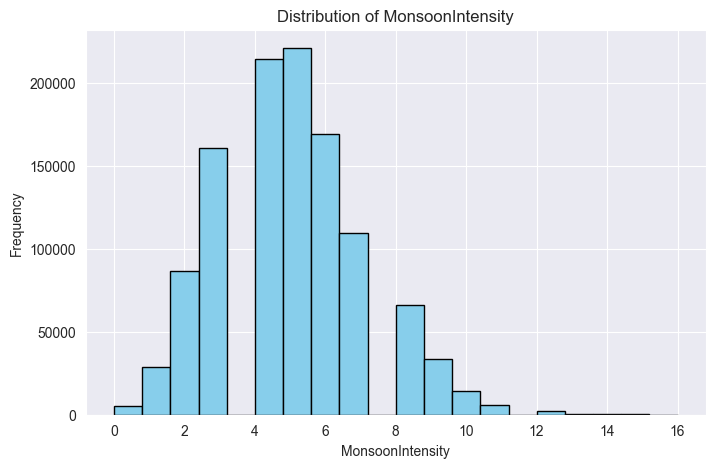

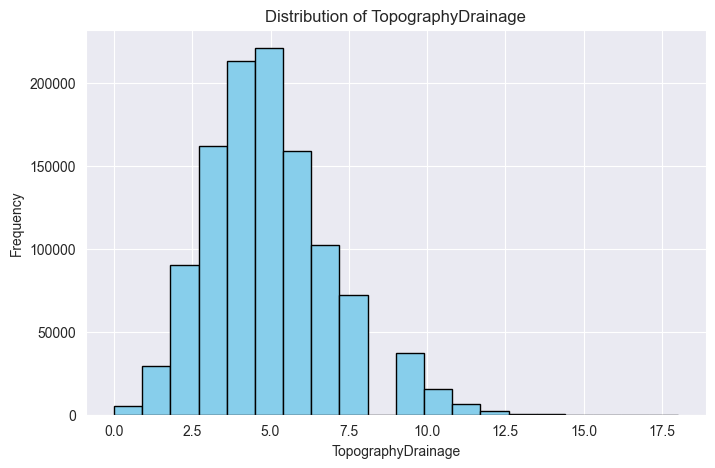

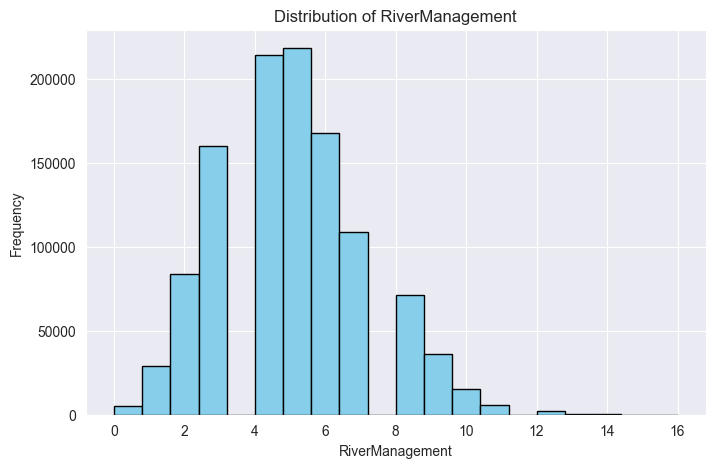

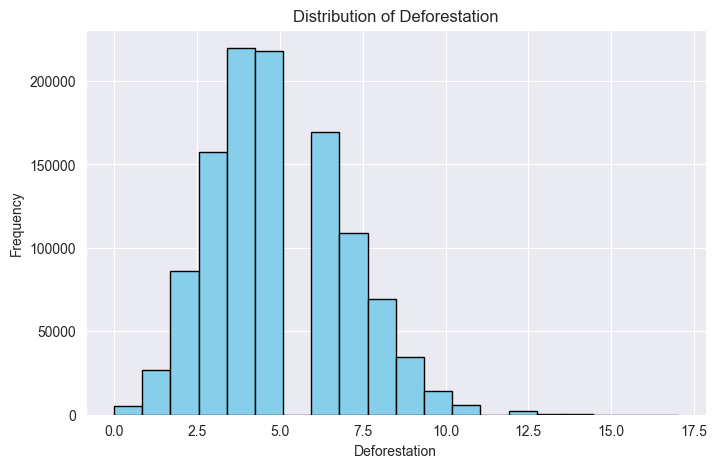

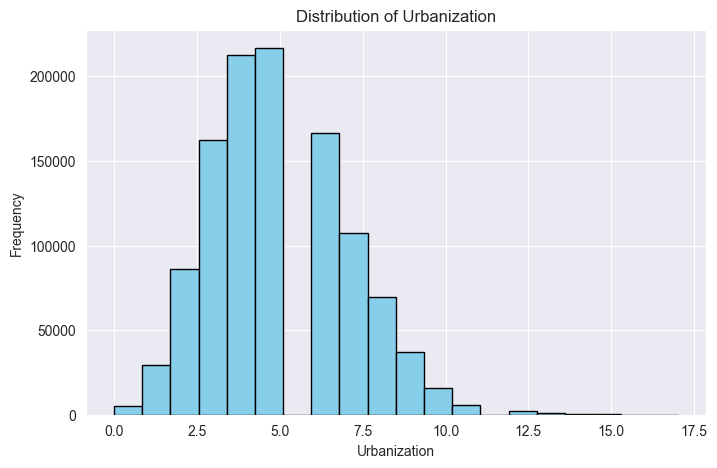

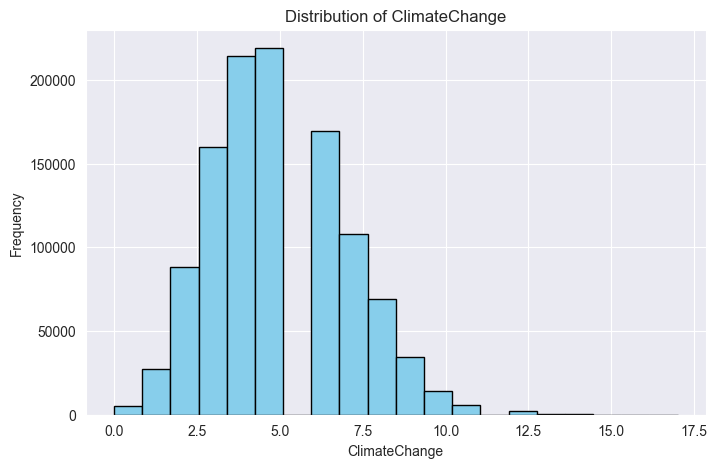

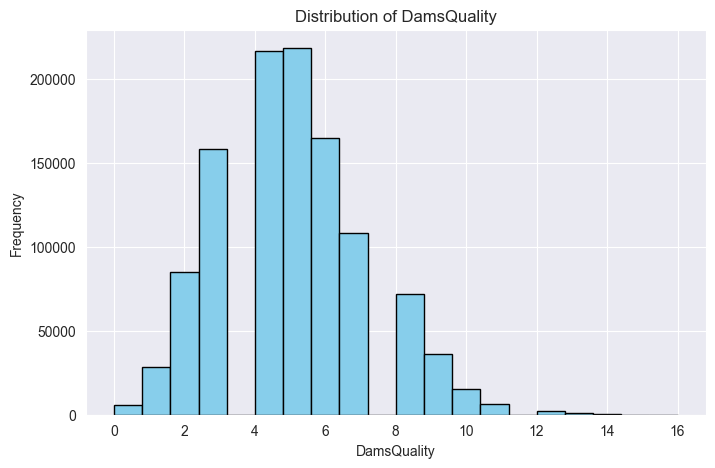

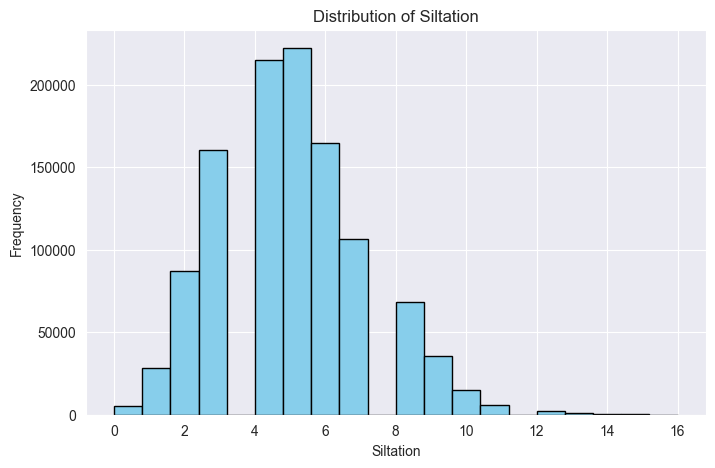

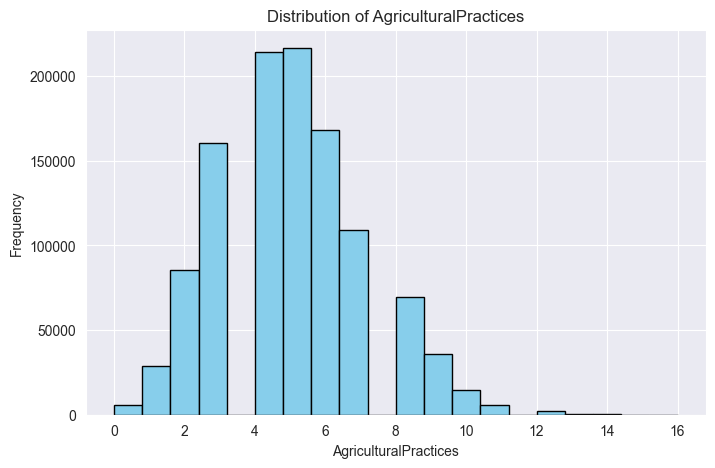

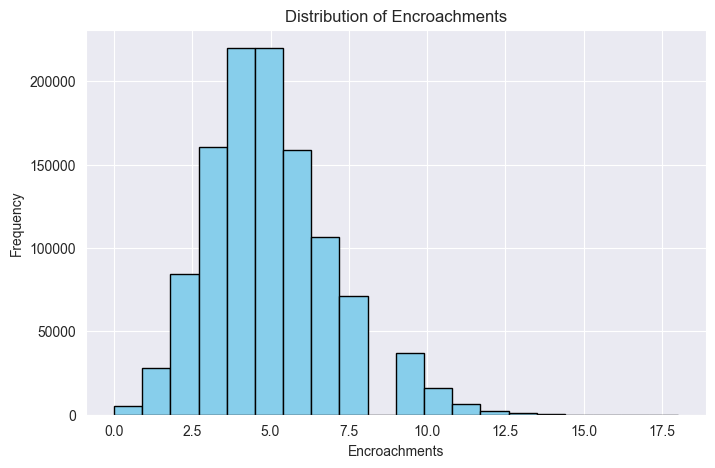

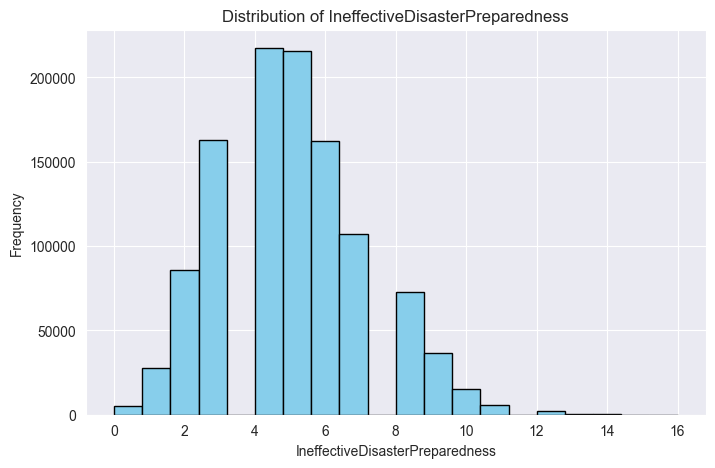

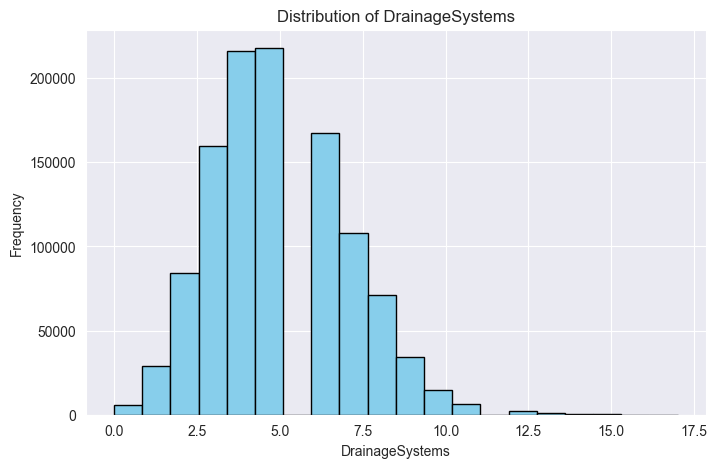

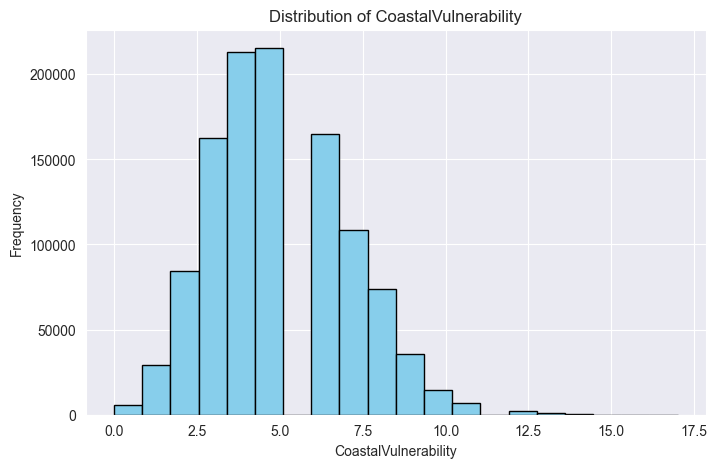

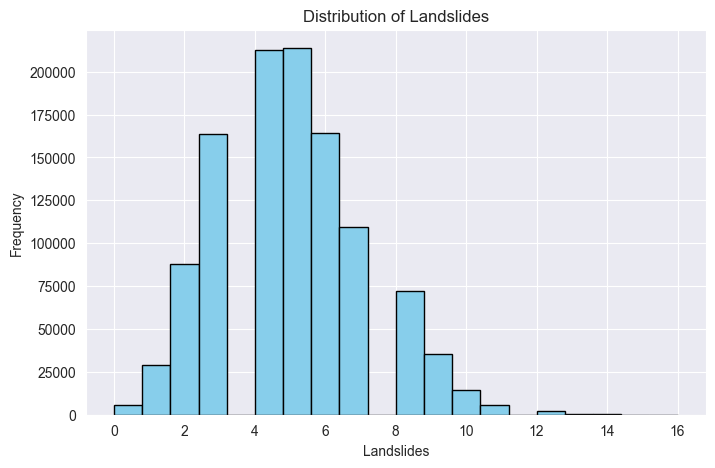

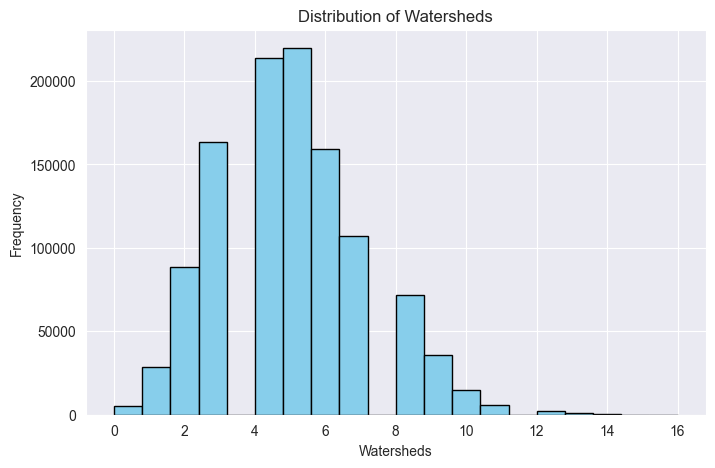

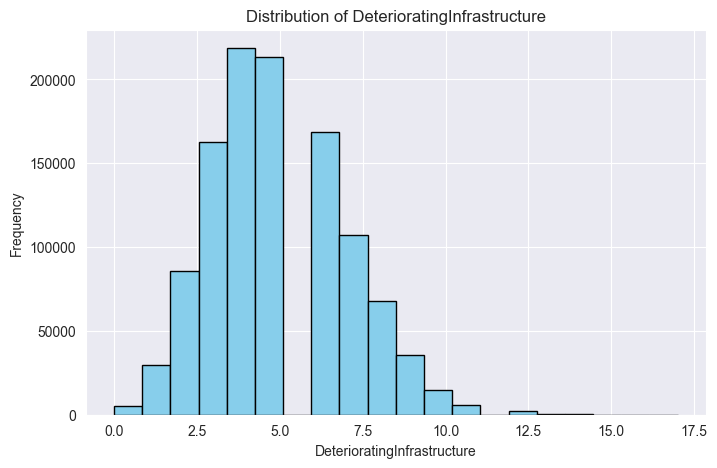

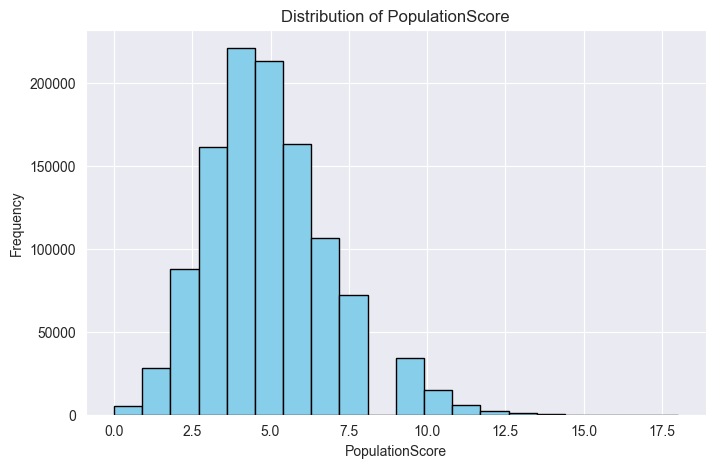

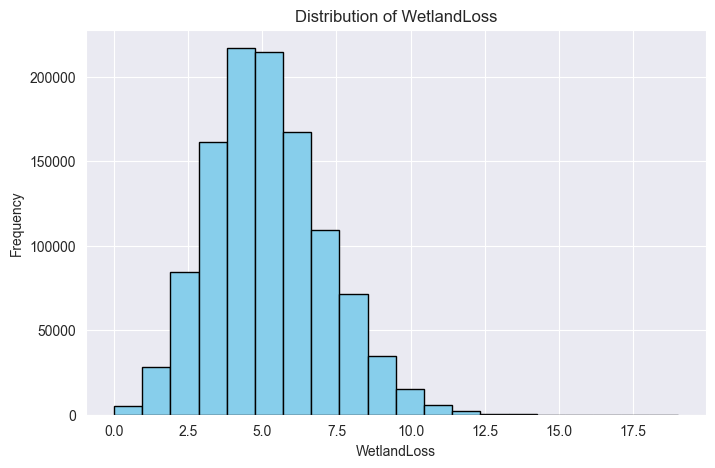

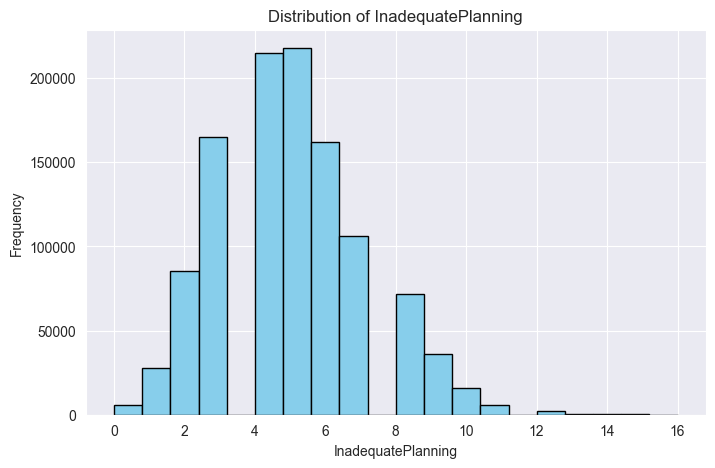

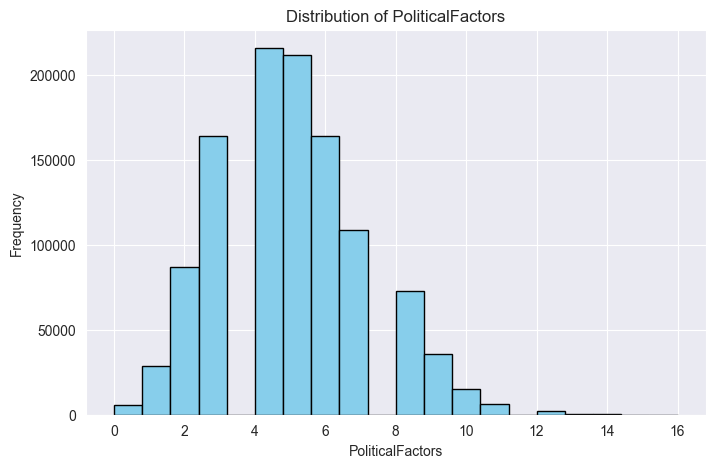

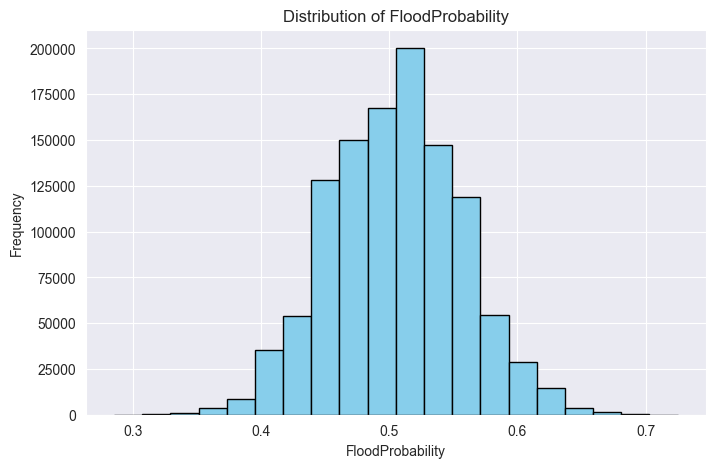

In [24]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.grid(True)
    plt.show()

In [25]:
df.apply(lambda x: x.nunique())

MonsoonIntensity                   17
TopographyDrainage                 19
RiverManagement                    17
Deforestation                      18
Urbanization                       18
ClimateChange                      18
DamsQuality                        17
Siltation                          17
AgriculturalPractices              17
Encroachments                      19
IneffectiveDisasterPreparedness    17
DrainageSystems                    18
CoastalVulnerability               18
Landslides                         17
Watersheds                         17
DeterioratingInfrastructure        18
PopulationScore                    19
WetlandLoss                        20
InadequatePlanning                 17
PoliticalFactors                   17
FloodProbability                   83
dtype: int64

In [26]:
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [31]:
numeric_features = ['MonsoonIntensity','TopographyDrainage','RiverManagement','Deforestation','Urbanization','ClimateChange','DamsQuality','Siltation','AgriculturalPractices','Encroachments','IneffectiveDisasterPreparedness','DrainageSystems','CoastalVulnerability','Landslides','Watersheds','DeterioratingInfrastructure','PopulationScore','WetlandLoss','InadequatePlanning', 'PoliticalFactors']
categorical_features = []
ctg= []

numeric_transformations = gen_features(
    columns=[[col] for col in numeric_features],
    classes=[
        {'class': SimpleImputer, 'strategy': 'mean'},
        {'class': StandardScaler}
        #{'class': MinMaxScaler}
    ]
)

categorical_transformations = gen_features(
    columns=[[col] for col in categorical_features],
        classes=[
        {'class': SimpleImputer, 'strategy': 'most_frequent'},
        {'class': OneHotEncoder}
    ]
)
bin_trans = gen_features(
    columns=[[col] for col in ctg],
        classes=[
        {'class': SimpleImputer, 'strategy': 'most_frequent'},
    ]
)


preprocessor = DataFrameMapper(
    numeric_transformations,
    df_out=True, default=False
)

preprocessor.fit(X_train)
X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [32]:
X_train_prep

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
839714,-0.933828,1.469130,1.467871,-0.459828,0.509779,-1.425295,0.500707,-0.448815,0.993877,-0.936564,0.026413,-1.423548,-1.895299,-0.448379,0.993330,1.005394,-1.893714,1.475771,-1.414623,2.422775
560193,0.038111,0.034631,-0.945607,-0.459828,-1.891448,0.518943,0.500707,0.034937,0.510415,-0.456846,0.026413,0.508888,0.020815,1.476739,-1.407839,-0.448180,4.852984,0.024570,-1.895417,-0.448120
554411,-0.933828,-0.921702,0.019784,0.027861,0.509779,0.518943,0.500707,-0.448815,-0.456510,0.022872,-0.936228,0.025779,0.020815,0.032901,0.032862,-1.417230,0.033914,0.024570,0.989343,1.944293
748944,0.038111,-0.921702,0.019784,0.515549,0.509779,-0.939235,0.980589,-0.932568,-0.456510,-0.936564,0.989055,-0.940439,0.499844,0.995460,1.473564,0.036344,0.033914,-0.459164,0.027756,-0.926602
773962,1.010050,-0.443536,-0.945607,0.515549,0.029534,-0.453176,0.020824,0.518689,0.510415,1.462026,0.989055,-0.457330,-0.937242,-0.929658,0.513096,0.520869,-1.411807,-0.459164,-0.453037,-0.448120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,-0.447858,0.990964,0.019784,-0.459828,-0.450712,0.032883,-0.938940,1.486194,-0.456510,-1.896000,0.026413,-1.423548,0.978872,-0.929658,0.993330,0.520869,-1.411807,-0.459164,0.027756,0.030363
259178,-0.933828,-0.443536,0.502480,0.027861,0.029534,1.005002,0.500707,1.486194,-1.423435,1.462026,-0.936228,0.991997,-0.937242,0.995460,1.953798,1.005394,-0.929900,-1.426632,-0.933830,1.465810
131932,0.038111,-0.443536,-1.910999,-1.435204,-0.930957,-0.453176,0.500707,1.486194,-0.939972,-0.936564,-0.936228,-0.457330,0.020815,-0.929658,-0.447372,0.036344,-0.929900,0.508304,0.989343,0.987328
671155,0.524081,2.425463,-0.462911,0.515549,-0.930957,0.518943,-0.938940,-0.932568,0.026953,-0.936564,0.026413,-0.940439,0.499844,0.514180,0.032862,0.036344,-0.447993,-0.459164,0.027756,0.030363


In [34]:
# Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_prep, y_train)

# Evaluate the model
y_test_pred = model.predict(X_test_prep)
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0009088705216153123


In [36]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.0009088705216153123
Root Mean Squared Error (RMSE): 0.03014747952342471
Mean Absolute Error (MAE): 0.02466506251355709
R-squared (R²): 0.6509322286811081
